> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-Show Appt 2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this analysis, we aim to explore various factors influencing patient attendance at medical appointments. By delving into a dataset containing information on patient demographics, medical conditions, appointment scheduling, and attendance status, we seek to address several key questions. These questions include investigating the impact of receiving SMS reminders on appointment attendance, assessing whether certain days of the week are associated with higher attendance rates, examining the relationship between age and appointment attendance, and exploring potential correlations between medical conditions such as hypertension and diabetes. Through this exploration, we aim to gain insights into the factors driving patient attendance behavior and identify potential areas for targeted interventions to improve appointment adherence and overall healthcare outcomes.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Methodology explained: 
1. Load data.
2. Read column names for possible readability issues in Python, and also examine the information and its formatting.
3. Use df.info() to display data, data usage, row information, and data types.
4. Use df.shape to show the number of rows and columns for better understanding.
5. Check to ensure unique values match the number of rows in some way, indicating that most rows are different.
6. Use df.describe() to identify outliers and any unusual numbers in the data that require further exploration.
7. Double-check for null values.
8. Check for duplicates.
9. Create a box plot for age to visualize the age distribution and use it for its intended purpose.
10. Prepare findings for cleaning.

In [2]:
#Load data set and present first rows
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Check for memory usage outliers, dtypes and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#Check number of rows and columns
df.shape

(110527, 14)

In [5]:
#Describe data information and look for outliers. 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Here we find the min age and max for Age are outliers. 

In [7]:
#Check unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#Check for nulls
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#Check for Duplicates
sum(df.duplicated())

0

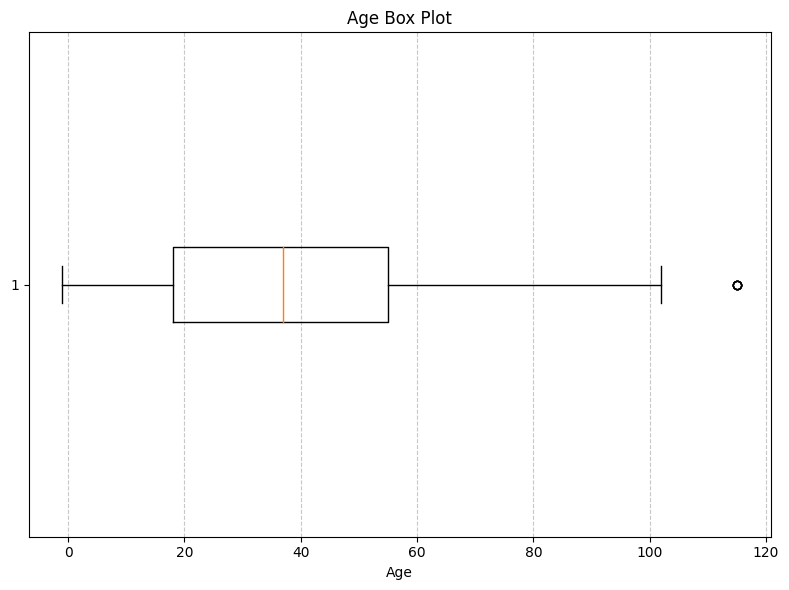

In [10]:
# Plot a box plot for the 'Age' variable
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False)
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analysis: Box plot identifies that there are two outliers, one is that there is a -1 age and the other one has a sole record that sticks out at the top. We will remove the age of -1 in data cleaning but leave the top number as age is feasible. 


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Query may not have been written properly or not registering 
df.query('Age =="-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [12]:
#Use python as my Query line is not working 
filtered_df = df[df['Age'] == -1]

print(filtered_df)

          PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  


In [13]:
#Drop -1 age record
df.drop(df.index[99832], inplace=True)

In [14]:
#Check to see if collumn dropped from 110527 to 110526
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [15]:
#recheck the Age max and min
df.Age.max(), df.Age.min()

(115, 0)

In [16]:
#How many people in DS
df.PatientId.nunique()

62298

In [17]:
#how many Appt ID are there? (is same as quantity of rows)
df.AppointmentID.nunique()

110526

In [18]:
#Check Data first 5
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
#clean up names for python readability
df = df.rename(columns={'PatientId': 'Patient_ID', 'AppointmentID': 'Appointment_ID', 'ScheduledDay': 'Scheduled_Day', 'AppointmentDay': 'Appointment_Day', 'Hipertension': 'Hypertension', 'SMS_received': 'SMS_Received', 'No-show': 'NoShow'})
df.head(2)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_Received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [20]:
#Drop Appt ID as it has no significance
df.drop('Appointment_ID', axis=1, inplace=True)
df.columns

Index(['Patient_ID', 'Gender', 'Scheduled_Day', 'Appointment_Day', 'Age',
       'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_Received', 'NoShow'],
      dtype='object')

In [21]:
#Change Scholarship, Hypertension, Diabetes, Alcoholism, SMSReceived to bool data type
for c in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_Received']:
    df[c] = df[c].astype('bool')

In [22]:
#Chack dtypes first
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Patient_ID       110526 non-null  float64
 1   Gender           110526 non-null  object 
 2   Scheduled_Day    110526 non-null  object 
 3   Appointment_Day  110526 non-null  object 
 4   Age              110526 non-null  int64  
 5   Neighbourhood    110526 non-null  object 
 6   Scholarship      110526 non-null  bool   
 7   Hypertension     110526 non-null  bool   
 8   Diabetes         110526 non-null  bool   
 9   Alcoholism       110526 non-null  bool   
 10  Handcap          110526 non-null  int64  
 11  SMS_Received     110526 non-null  bool   
 12  NoShow           110526 non-null  object 
dtypes: bool(5), float64(1), int64(2), object(5)
memory usage: 8.1+ MB


In [23]:
##Fix data types further (Possibly take this out)
# Convert 'Patient_ID' from float to int
df['Patient_ID'] = df['Patient_ID'].astype(int)

# Convert 'Scheduled_Day' and 'Appointment_Day' to datetime
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

# Convert boolean columns to bool type
bool_columns = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_Received']
df[bool_columns] = df[bool_columns].astype(bool)


# Verify changes
df.dtypes



Patient_ID                       int64
Gender                          object
Scheduled_Day      datetime64[ns, UTC]
Appointment_Day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                       bool
Hypertension                      bool
Diabetes                          bool
Alcoholism                        bool
Handcap                          int64
SMS_Received                      bool
NoShow                          object
dtype: object

In [24]:
#Check data
df.head()

,Patient_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_Received,NoShow
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Below we will look at a few single-variable (1d) Explorations

In [25]:
# Count occurrences of each neighborhood
neighborhood_counts = df['Neighbourhood'].value_counts()

# Calculate the frequency of diabetes diagnosis
diabetes_counts = df['Diabetes'].value_counts()

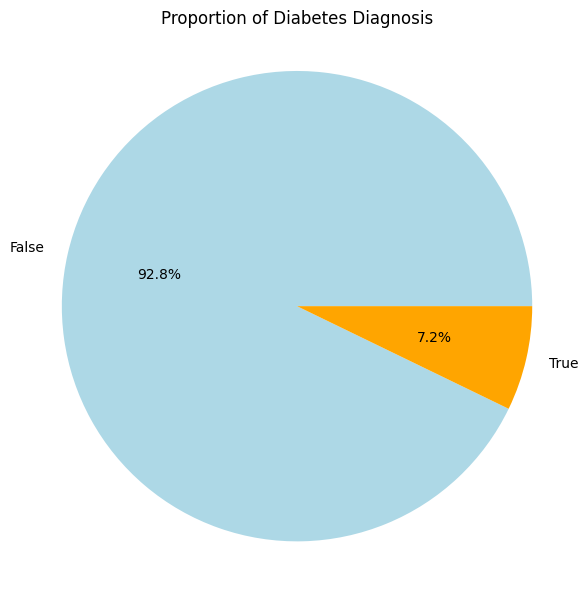

In [26]:
# Plot the pie chart with adjusted size 
plt.figure(figsize=(6, 6)) 
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Proportion of Diabetes Diagnosis')
plt.axis('equal')
plt.tight_layout()
plt.show()


### Analysis: This provides insight on the demographic of the data.

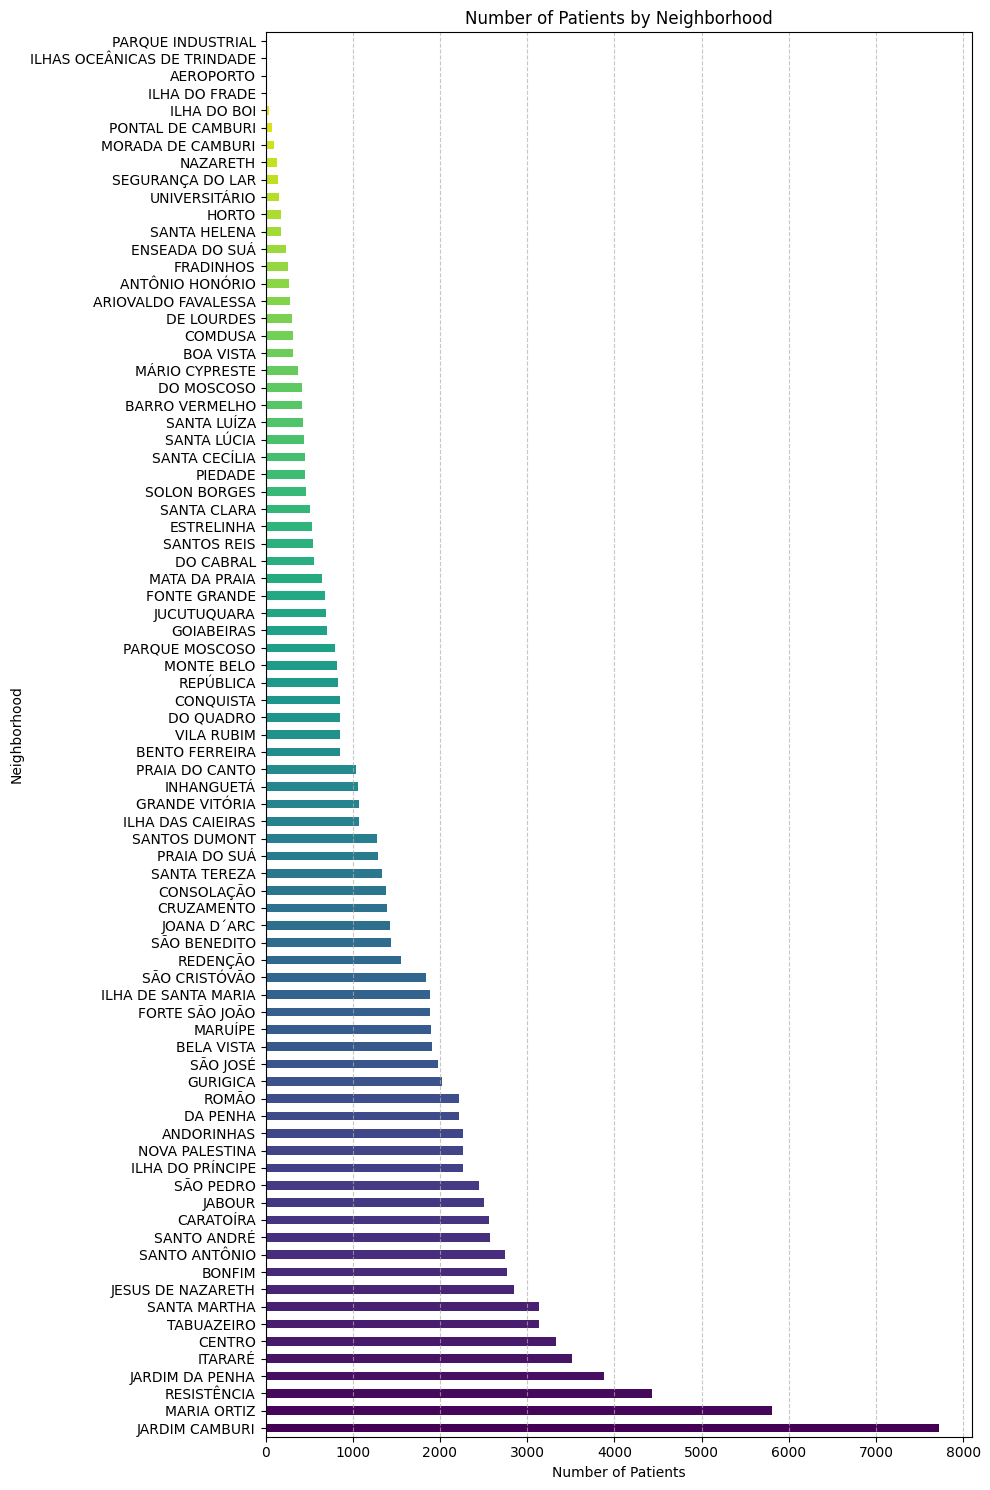

In [27]:
# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(neighborhood_counts)))

# Plot the side bar chart with multicolored bars
plt.figure(figsize=(10, 15))
neighborhood_counts.plot(kind='barh', color=colors)
plt.title('Number of Patients by Neighborhood')
plt.xlabel('Number of Patients')
plt.ylabel('Neighborhood')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analysis: This provides insight on the demographic of the data.

In [28]:
#Matrix of correlation
df.corr(numeric_only=True).style.background_gradient(cmap='Blues')

,Patient_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_Received
Patient_ID,1.000000,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742
Age,-0.004121,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633
Scholarship,-0.002877,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192
Hypertension,-0.006436,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270
Diabetes,0.001608,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552
Alcoholism,0.011014,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149
Handcap,-0.007915,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162
SMS_Received,-0.009742,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000


### Analysis: A correlation matrix of all the data reveals interesting insights, such as hypertension showing a high correlation with age and diabetes showing a moderate correlation with hypertension. Understanding these correlations can help identify potential risk factors for missed appointments and inform targeted intervention strategies.


### Research Question 1 (Does sending SMS reduce or increase no-shows?)

In [29]:
#   Markdown cells to document your observations and findings.
df.groupby(["NoShow", "SMS_Received"]).size()

NoShow  SMS_Received
No      False           62509
        True            25698
Yes     False           12535
        True             9784
dtype: int64

### Analysis: This shows that there are 35422 patients that received sms and only 9784 actually showed up for their appts while 25698 did not show up. 

In [30]:
#Function for future use
def plot_grouped_bar(data, x_labels, legend_labels, title, xlabel, ylabel, colors=['lightblue', 'lightgreen'], rotation=0, figsize=(8, 6)):
    """
    Plot a grouped bar chart.

    Parameters:
        data (DataFrame): The DataFrame containing the data to plot.
        x_labels (list): Labels for the x-axis.
        legend_labels (list): Labels for the legend.
        title (str): The title of the plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        colors (list): Colors for the bars (default is ['lightblue', 'lightgreen']).
        rotation (int): Rotation angle of x-axis labels (default is 0).
        figsize (tuple): Size of the figure (default is (8, 6)).
    """
    plt.figure(figsize=figsize)
    data.plot(kind='bar', color=colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(len(x_labels)), x_labels, rotation=rotation)
    plt.legend(title='No-Show', labels=legend_labels)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<Figure size 800x600 with 0 Axes>

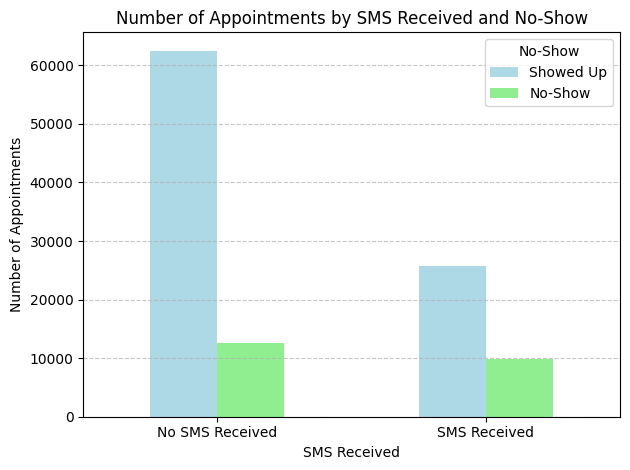

In [31]:
# Group data by 'SMS_Received' and 'NoShow', and count the occurrences
sms_no_show_counts = df.groupby(['SMS_Received', 'NoShow']).size().unstack(fill_value=0)


plot_grouped_bar(data=sms_no_show_counts,
                 x_labels=['No SMS Received', 'SMS Received'],
                 legend_labels=['Showed Up', 'No-Show'],
                 title='Number of Appointments by SMS Received and No-Show',
                 xlabel='SMS Received',
                 ylabel='Number of Appointments')


###  Analysis: Without SMS received: The left side of the chart shows the correlation between those who no-showed and those who didn't without receiving an SMS. With SMS received: The right side displays the correlation between those who received an SMS and whether they showed up or not. To ensure a fair comparison, I adjusted the sample sizes to be equal while maintaining the original ratio.

To determine the expected number of people who did not show up for appointments if the sample size for people who received an SMS matched the sample size for those who did not, we need to scale up the number of no-shows in the SMS group proportionally.

Let's calculate it:

    First, we need to find the rate of no-shows for each group:
        For the SMS group: 9784/25698≈0.3805256989784≈0.3805 or 38.05%
        For the no SMS group: 12535/62509≈0.20046250912535≈0.2004 or 20.04%

    Next, we calculate the expected number of no-shows in the SMS group if its sample size matched the no SMS group:
        Expected number of no-shows in the SMS group = Rate of no-shows in the SMS group ×× Total number of people in the no SMS group
        Expected number of no-shows in the SMS group = 0.3805×75044≈28581.7420.3805×75044≈28581.742

<Figure size 800x600 with 0 Axes>

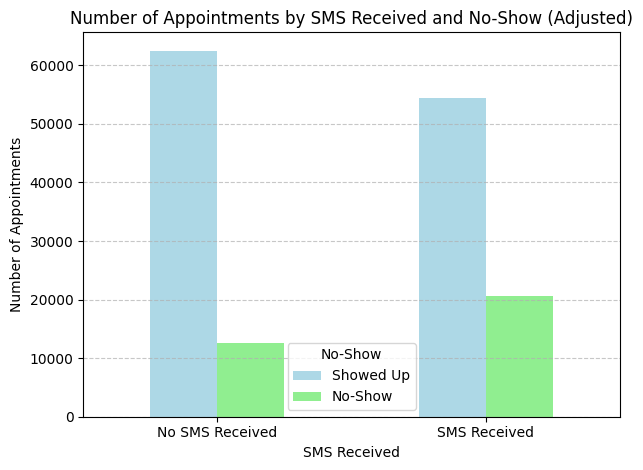

In [32]:
# Group data by 'SMS_Received' and 'NoShow', and count the occurrences
sms_no_show_counts = df.groupby(['SMS_Received', 'NoShow']).size().unstack(fill_value=0)

# Calculate the total number of appointments in each group
total_sms_received = sms_no_show_counts.loc[True].sum()
total_no_sms_received = sms_no_show_counts.loc[False].sum()

# Calculate the ratio of sample sizes
ratio = total_no_sms_received / total_sms_received

# Adjust the counts in the SMS received group to match the sample size of the no SMS received group
sms_no_show_counts_adjusted = sms_no_show_counts.copy()
sms_no_show_counts_adjusted.loc[True] *= ratio

# Plot the adjusted grouped bar plot
plot_grouped_bar(data=sms_no_show_counts_adjusted,
                 x_labels=['No SMS Received', 'SMS Received'],
                 legend_labels=['Showed Up', 'No-Show'],
                 title='Number of Appointments by SMS Received and No-Show (Adjusted)',
                 xlabel='SMS Received',
                 ylabel='Number of Appointments')


### Analysis: Apart from SMS reminders, other factors such as illness, age, addiction, or even the day of the week may influence appointment attendance. 

### Research Question 2  (Does day of the week influence no show? )

In [33]:
# Function to plot bar chart with different colors
def plot_bar_chart(data, x_labels, title, xlabel, ylabel, rotation=0):
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('husl', len(data))
    bars = plt.bar(x_labels, data, color=colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

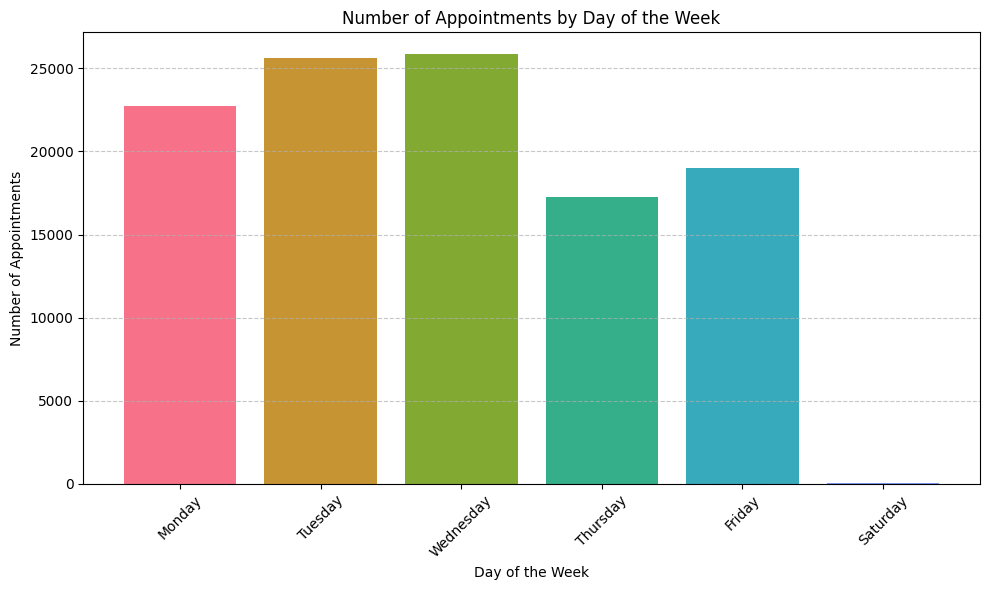

In [34]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Appointment_Day' to datetime if necessary
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

# Extract day of the week from 'Appointment_Day'
df['Day_of_Week'] = df['Appointment_Day'].dt.day_name()

# Count appointments for each day of the week
appointment_counts = df['Day_of_Week'].value_counts().reindex(day_order)

# Plot the count of appointments for each day of the week with different colors
plot_bar_chart(data=appointment_counts,
               x_labels=appointment_counts.index,
               title='Number of Appointments by Day of the Week',
               xlabel='Day of the Week',
               ylabel='Number of Appointments',
               rotation=45)

<Figure size 1000x600 with 0 Axes>

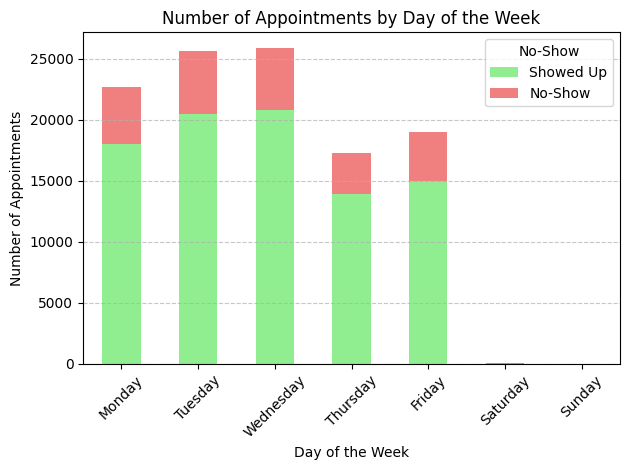

In [35]:
# Group data by day of the week and count the number of appointments for each day
appointments_by_day = df.groupby('Day_of_Week')['NoShow'].value_counts().unstack(fill_value=0)

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the bar graph
plt.figure(figsize=(10, 6))
appointments_by_day.reindex(day_order).plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])
plt.title('Number of Appointments by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='No-Show', labels=['Showed Up', 'No-Show'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analysis: People tend to show up more at the beginning of the week compared to later days.

### Research Question 3  (Is there a positive or negative correlation between age and noshows?)

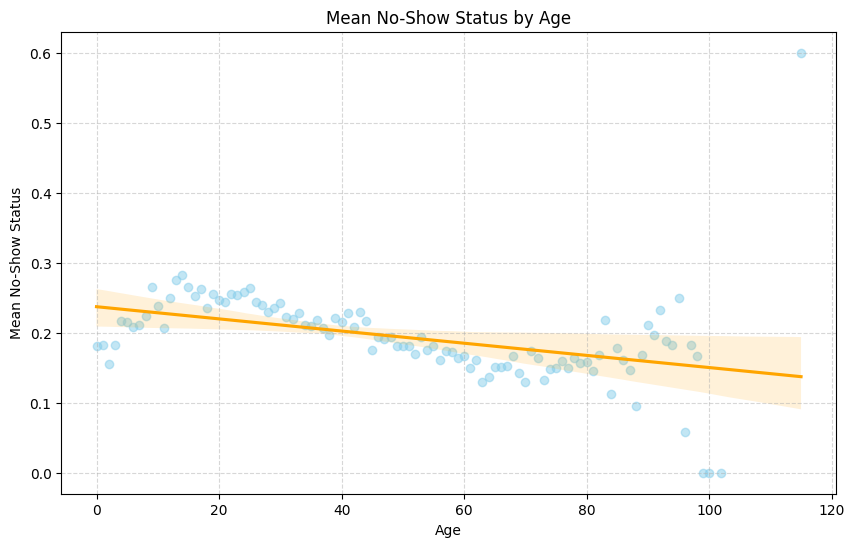

In [36]:
##Question 3
##Correlation between age and not showing up for their appts

df['NoShow_Num'] = df['NoShow'].map({'Yes': 1, 'No': 0})

# Calculate the mean not showing up for each age
no_show_mean = df.groupby('Age')['NoShow_Num'].mean().reset_index()

# Plot scatter plot with line fit
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='NoShow_Num', data=no_show_mean, scatter_kws={'color': 'skyblue', 'alpha': 0.5}, line_kws={'color': 'orange'})
plt.xlabel('Age')
plt.ylabel('Mean No-Show Status')
plt.title('Mean No-Show Status by Age')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

### Analysis: As people get older, they tend to show up less often for their appointments. However, it's essential to note any outliers in the data that could skew the analysis.

<a id='conclusions'></a>
## Conclusion

> The analysis of the data reveals valuable insights into factors influencing appointment attendance. While SMS reminders appear to have an impact on no-show rates, other variables such as age, day of the week, and underlying health conditions also play significant roles. Adjusting sample sizes to maintain ratios enables a fair comparison, highlighting the importance of considering various factors simultaneously. Additionally, the correlation matrix underscores the interplay between different variables, offering opportunities for targeted interventions to improve attendance rates. Overall, a holistic approach that addresses multiple factors, including SMS reminders and demographic characteristics, is crucial for enhancing appointment attendance and optimizing healthcare delivery.

## Limitation
1 Limitation was that the sample sizes were not the same at the beginning which would have more than likely show a decrease in no-shows as SMS reminders came in. I also was not given the same demographics for each sample size.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Limitation
1 Limitation was that the sample sizes were not the same at the beginning which would have more than likely show a decrease in no-shows as SMS reminders came in. I also was not given the same demographics for each sample size.

In [37]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 982501 bytes to Investigate_a_Dataset.html
